In [3]:
%pip install tqdm==4.66.4 | tail -n 1
# %pip install numpy==1.24.3 | tail -n 1
%pip install pandas==2.1.4 | tail -n 1
%pip install matplotlib==3.8.0 | tail -n 1
%pip install seaborn==0.13.2 | tail -n 1
%pip install scikit-learn==1.5.0 | tail -n 1
%pip install ucimlrepo==0.0.7 | tail -n 1
%pip install missingno==0.4.2 | tail -n 1

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

In [7]:
def plot_histograms(X, y=None):
    if y is not None:
        X = X.copy()  # Avoid modifying the original DataFrame
        X['label'] = y  # Add labels for grouping

    for col in X.columns:
        plt.figure(figsize=(8, 6))
        if X[col].dtype in ['float64', 'int64']:  # Numerical columns
            # Adjust transparency (alpha) and add more bins for clarity
            sns.histplot(data=X, x=col, hue='label', kde=False, bins=30, alpha=0.5, edgecolor="black")
        else:  # Categorical columns
            # Stacked bar chart for better distinction
            sns.countplot(data=X, x=col, hue='label', dodge=False, alpha=0.8, edgecolor="black")
        plt.title(f"Distribution of {col}")
        plt.tight_layout()
        plt.show()


In [8]:
from ucimlrepo import fetch_ucirepo 

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

print(heart_disease.metadata['abstract'])

4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach


In [ ]:
print(heart_disease.metadata['additional_info'] ['summary'])

In [9]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [10]:
X.shape

(303, 13)

In [11]:
print(X.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use 'median' if it better suits the data
X['ca'] = imputer.fit_transform(X[['ca']])
X['thal'] = imputer.fit_transform(X[['thal']])

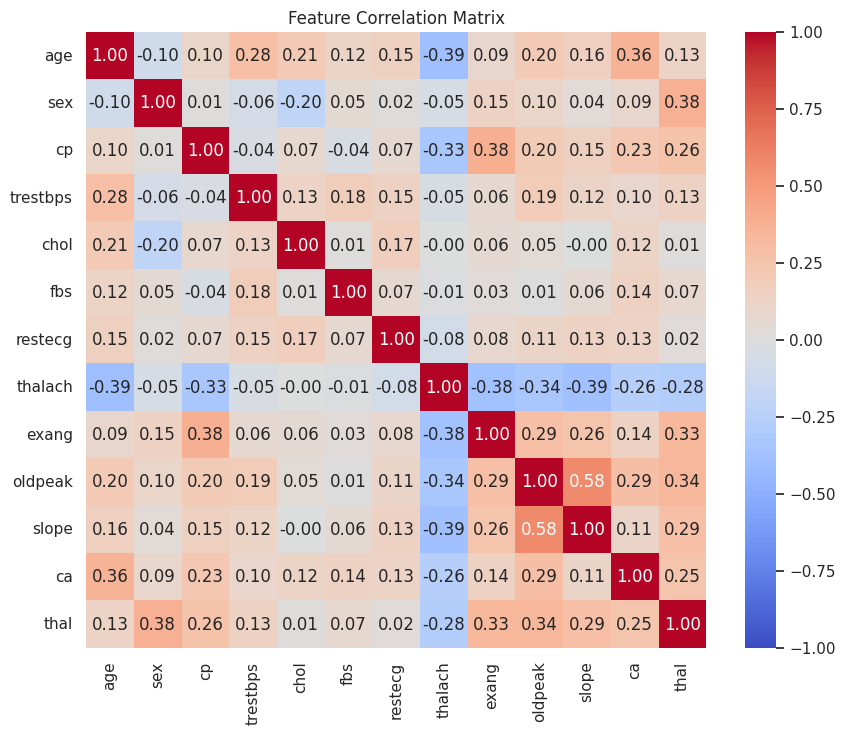

In [14]:
corr_matrix = X.corr()

    # Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()


In [15]:
y=y.map(lambda x: 1 if x in {1,2,3} else 0)
y.head()

,num
0,0
1,1
2,1
3,0
4,0


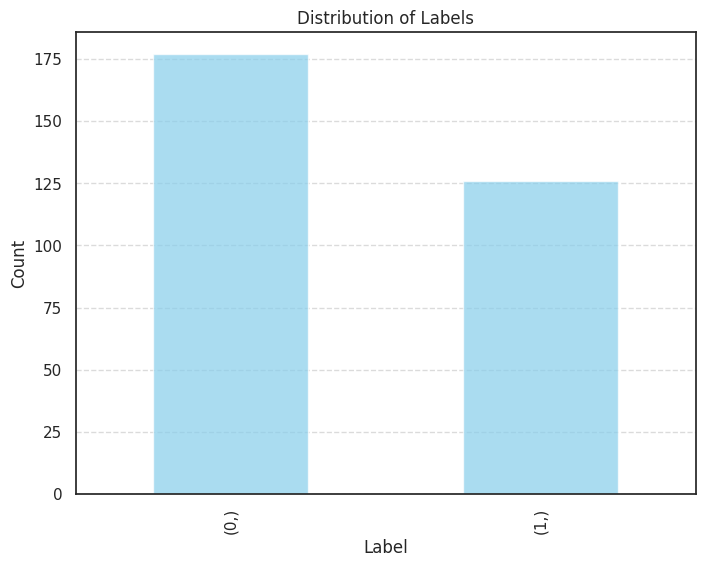

In [16]:
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', alpha=0.7, color='skyblue')
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
# Compute the mean of features grouped by the labels

data = X.copy()
data['target'] = y
mean_table = data.groupby('target').mean()
del(data)
mean_table

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,53.107345,0.581921,2.858757,129.949153,243.429379,0.135593,0.892655,157.073446,0.163842,0.716949,1.457627,0.384275,3.981549
1,56.309524,0.817460,3.579365,134.134921,251.277778,0.166667,1.126984,139.119048,0.555556,1.492857,1.801587,1.076764,5.791541


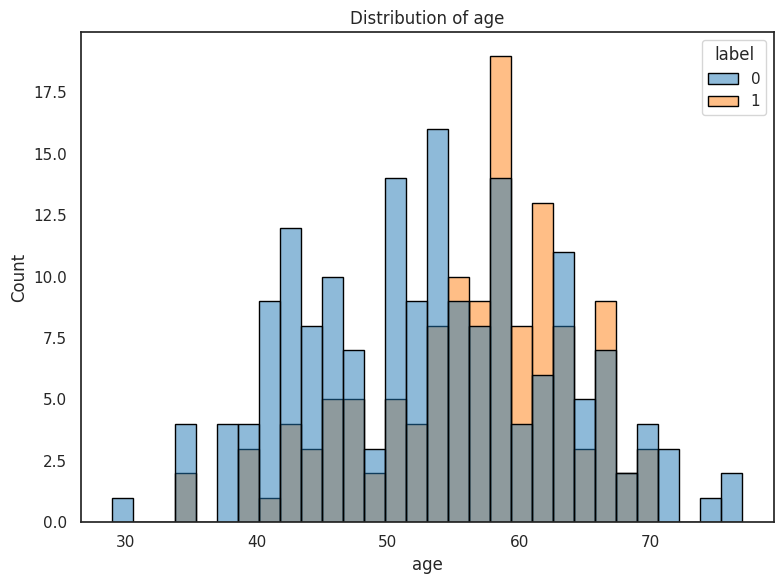

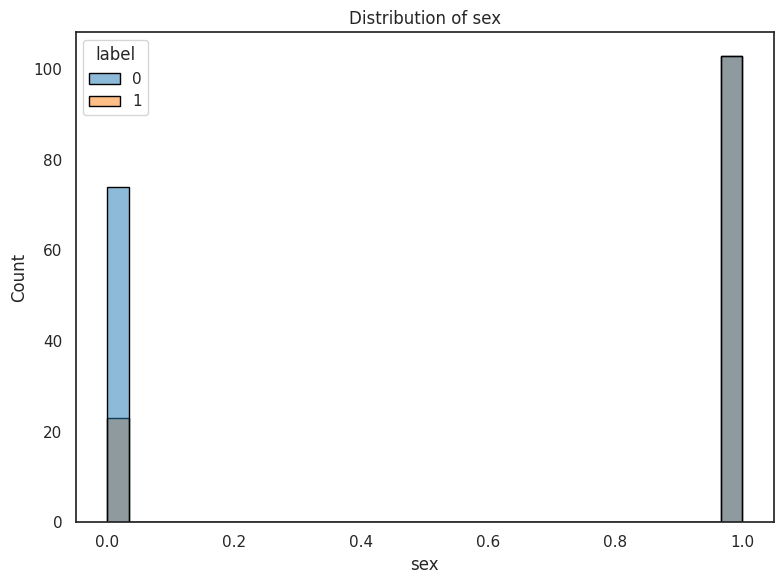

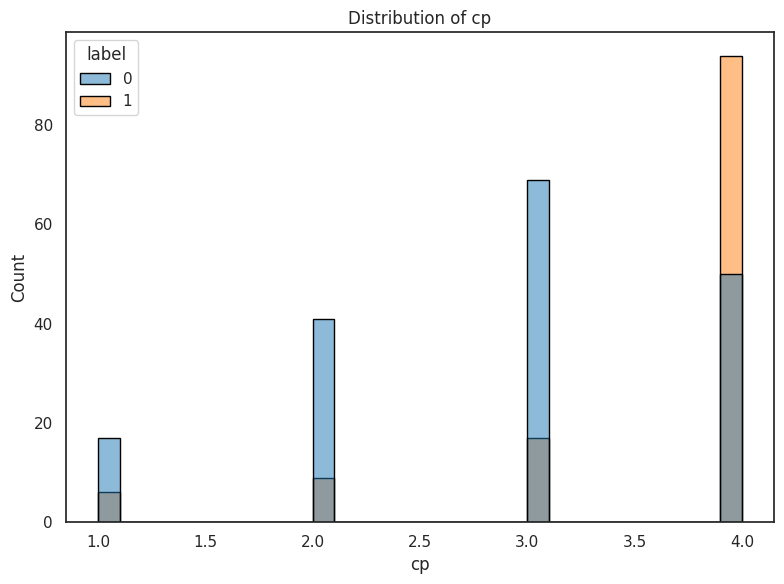

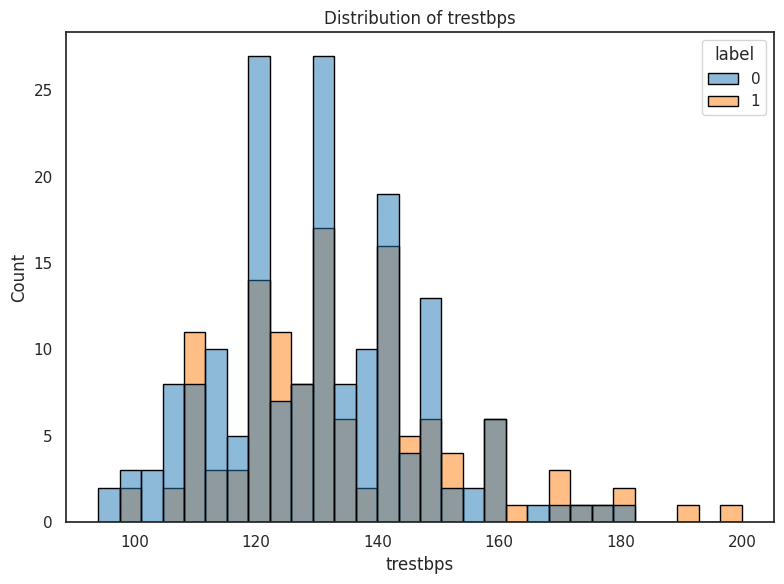

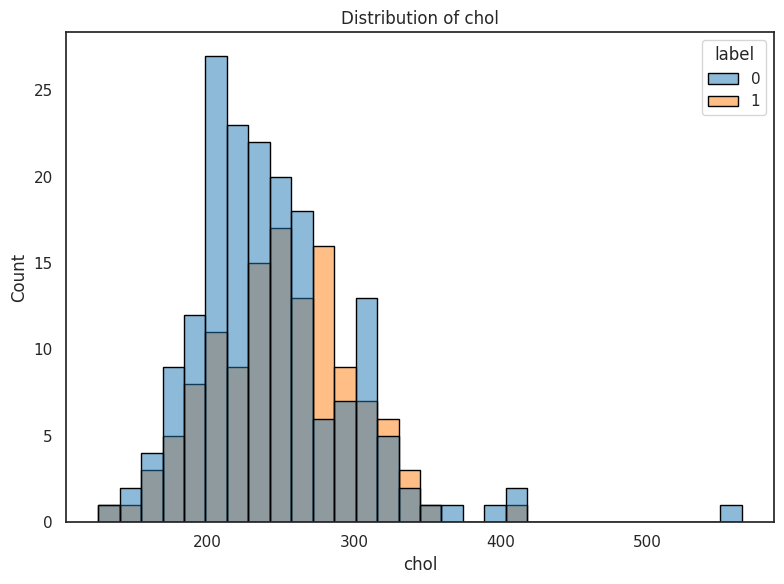

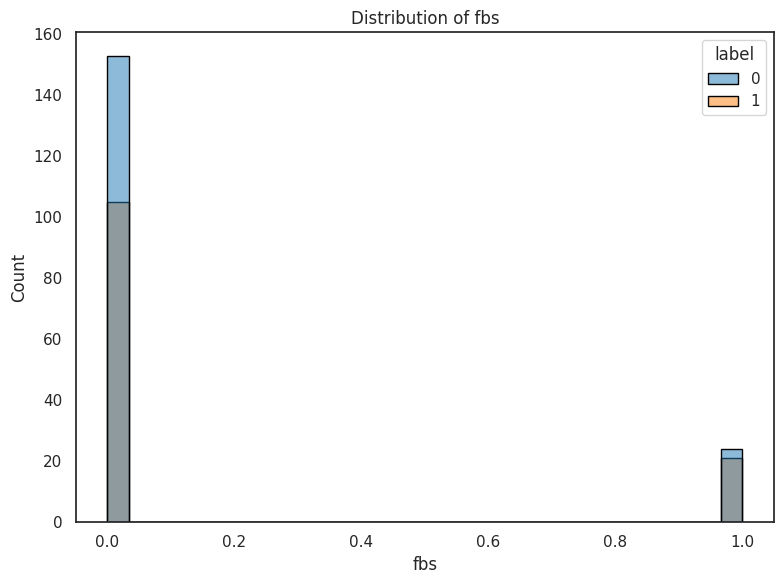

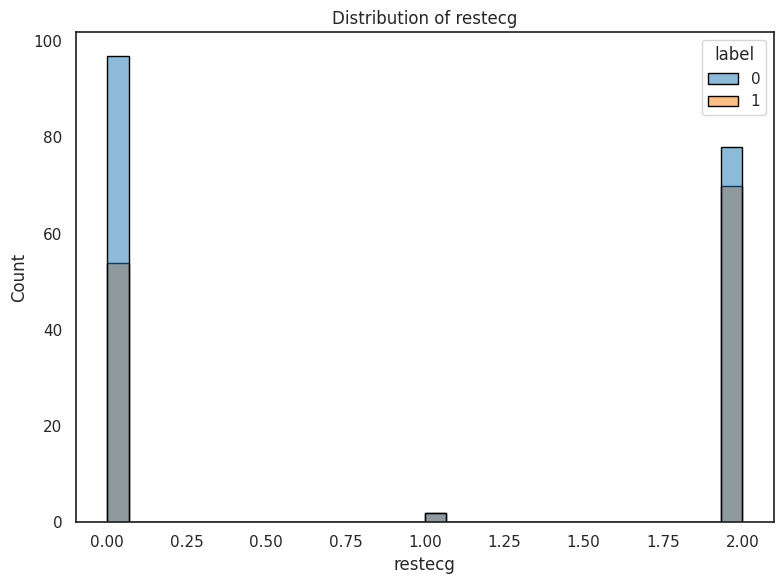

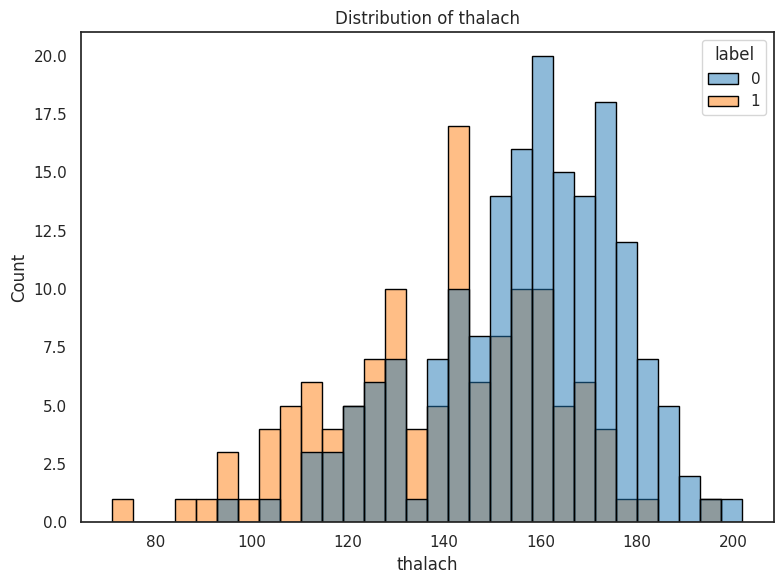

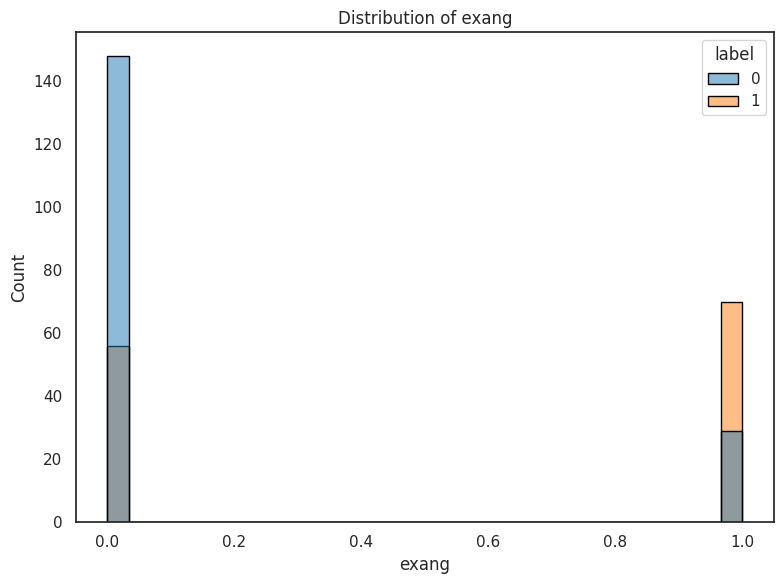

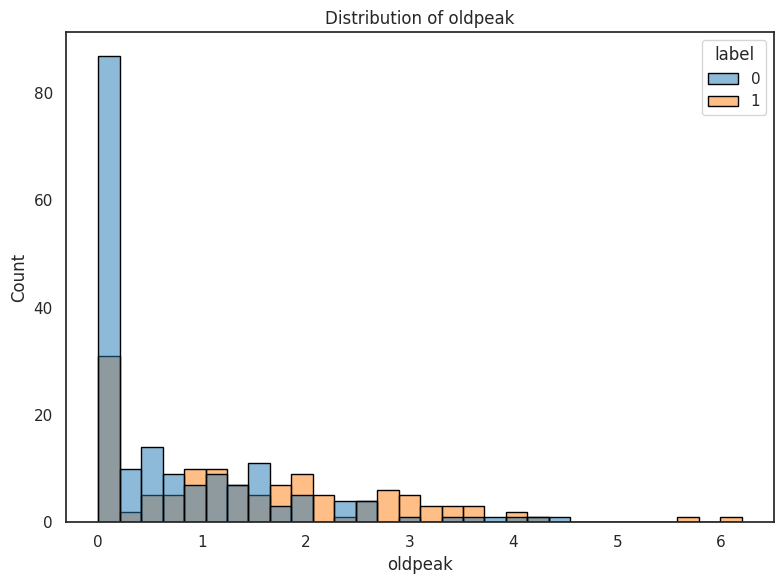

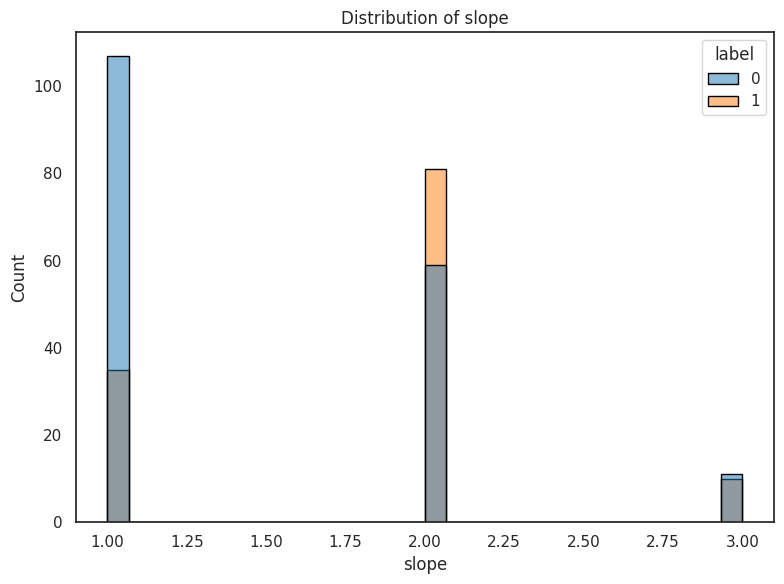

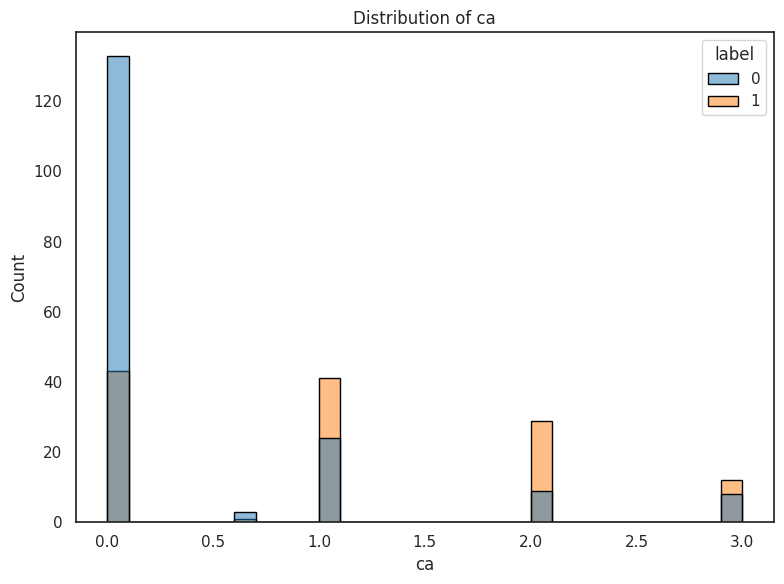

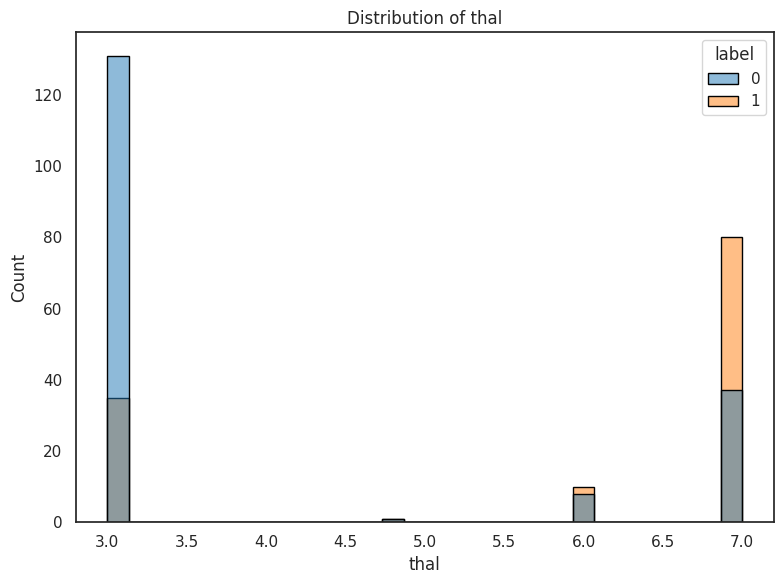

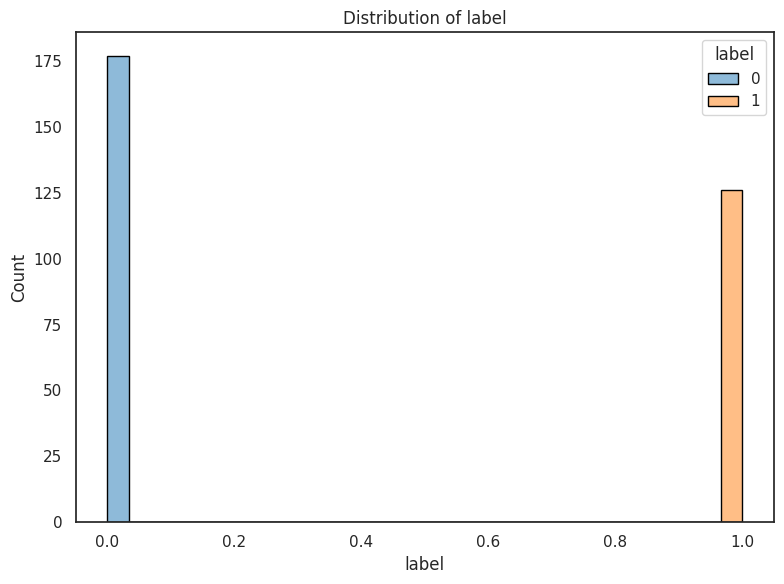

In [18]:
plot_histograms(X,y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [21]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


#Use the test data to evaluate the model's performance.
y_pred= logistic_model.predict(X_test)
print("Logistic Regression Classification Report:")

print(classification_report(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.83      0.76      0.79        25

    accuracy                           0.84        61
   macro avg       0.83      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.83      0.76      0.79        25

    accuracy                           0.84        61
   macro avg       0.83      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



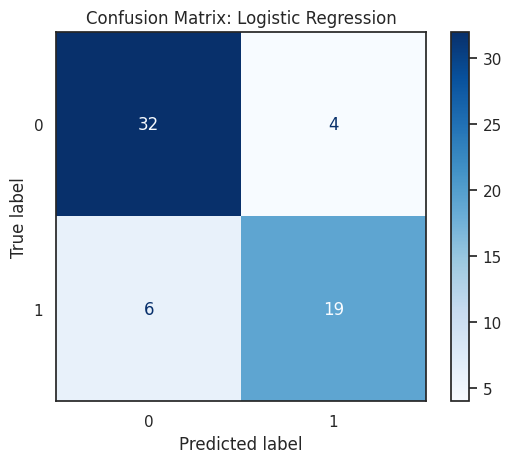

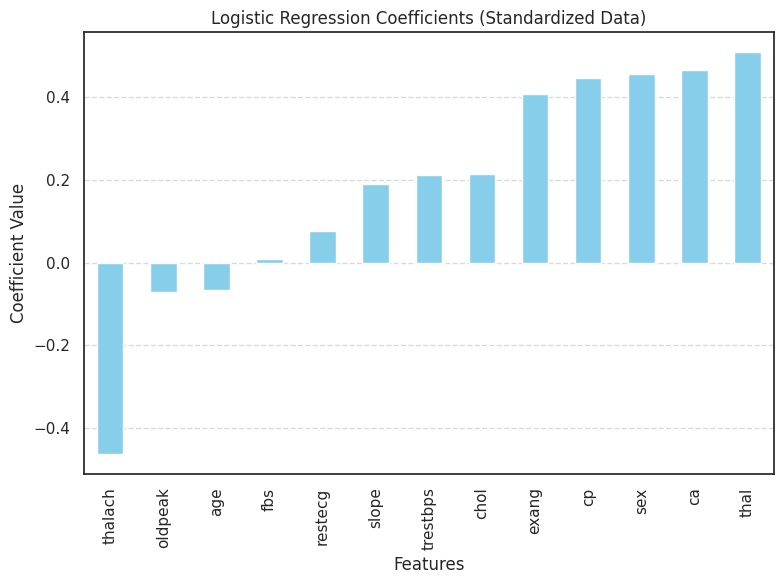

In [29]:

from sklearn.preprocessing import StandardScaler
# Step 1: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform it
X_test_scaled = scaler.transform(X_test)       # Transform the test data using the same scaler

# Step 2: Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)  # Train the model on the standardized data

# Step 3: Evaluate the model
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test_scaled, y_test, cmap="Blues")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# Step 5: Plot logistic regression coefficients
plt.figure(figsize=(8, 6))
coefficients = pd.Series(logistic_model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='bar', color='skyblue')
plt.title("Logistic Regression Coefficients (Standardized Data)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        36
           1       0.80      0.80      0.80        25

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



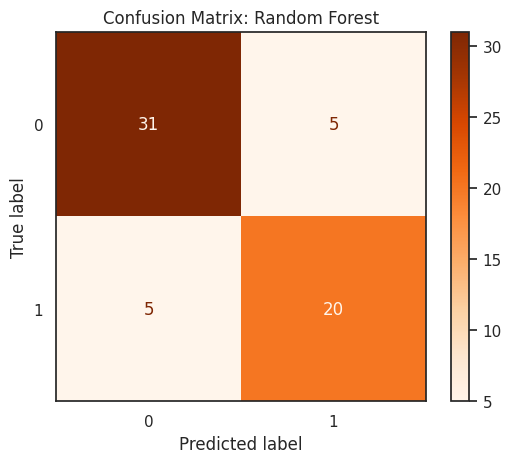

In [35]:
# Predictions and report
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Oranges")
plt.title("Confusion Matrix: Random Forest")
plt.show()


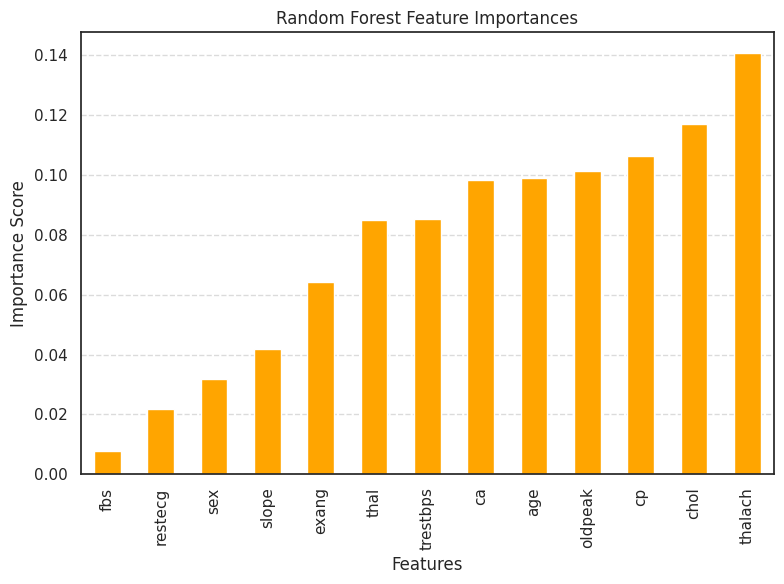

In [36]:
# Plot feature importances
plt.figure(figsize=(8, 6))
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='bar', color='orange')
plt.title("Random Forest Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [32]:
feature_of_interest = "age"
grid_points = 50

# Create the grid for Feature1
Xs = np.linspace(X[feature_of_interest].min(), X[feature_of_interest].max(), grid_points)
print(f"First five samples of X_s: \n{Xs[:5]}")

# Initialize the array to store partial dependence values
partial_dependence = np.zeros(grid_points)


First five samples of X_s: 
[29.         29.97959184 30.95918367 31.93877551 32.91836735]


In [39]:
temp_X = X.copy()

for n, xs in enumerate(Xs):

    temp_X[feature_of_interest] = xs  # Add the fixed Feature1 column
    # Predict using the model for all rows f(x)
    predictions = rf_model.predict_proba(temp_X)[:,1]
    # Store the mean prediction for this grid point
    partial_dependence[n] = predictions.mean()

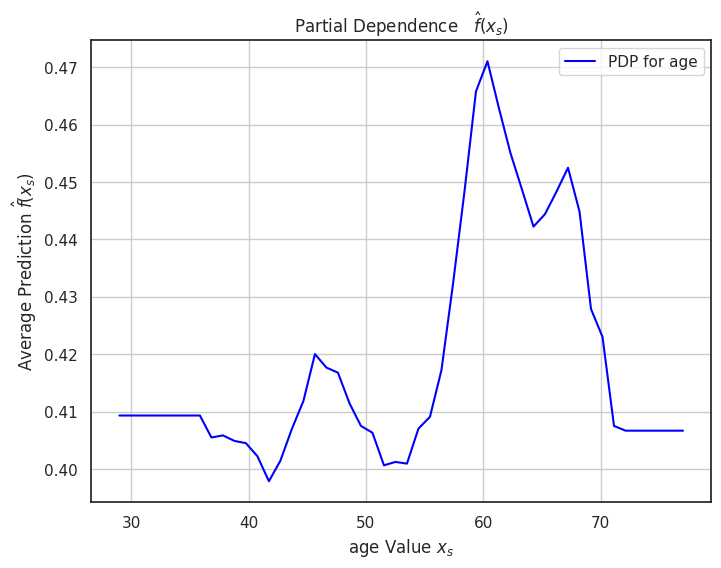

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(Xs, partial_dependence, label=f"PDP for {feature_of_interest}", color="blue")
plt.xlabel(f"{feature_of_interest} Value $x_s$")
plt.ylabel(f"Average Prediction $\hat{{f}}(x_s)$")
plt.title(f"Partial Dependence   $\hat{{f}}(x_s)$")
plt.legend()
plt.grid()
plt.show()

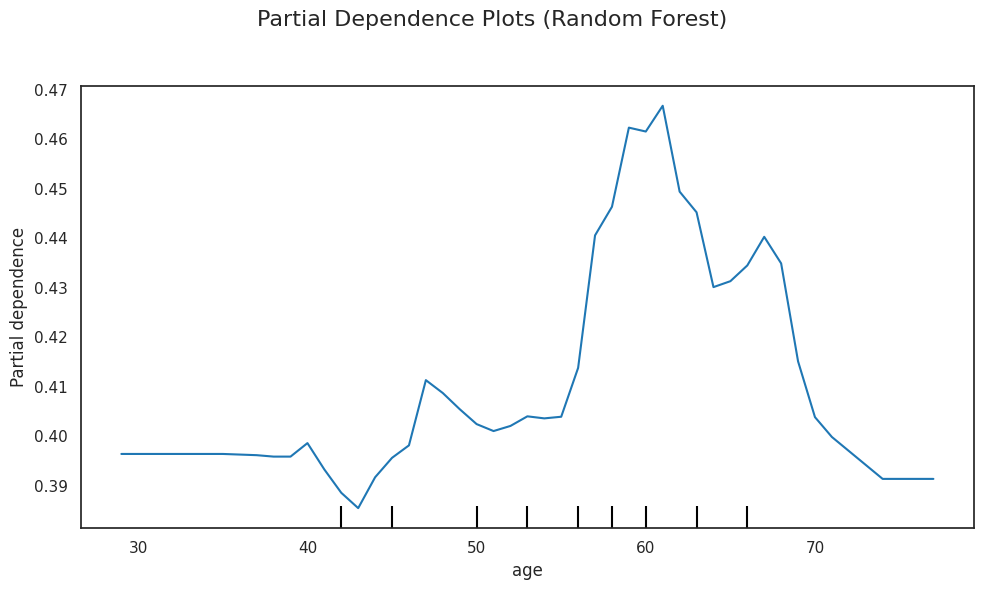

In [40]:
from sklearn.inspection import PartialDependenceDisplay
features_to_plot = [0]

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    rf_model, 
    X_train, 
    features=features_to_plot, 
    feature_names=X.columns, 
    grid_resolution=50, 
    ax=ax)

plt.suptitle("Partial Dependence Plots (Random Forest)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for the title
plt.show()

Processing Feature Index: 0, Feature Name: age


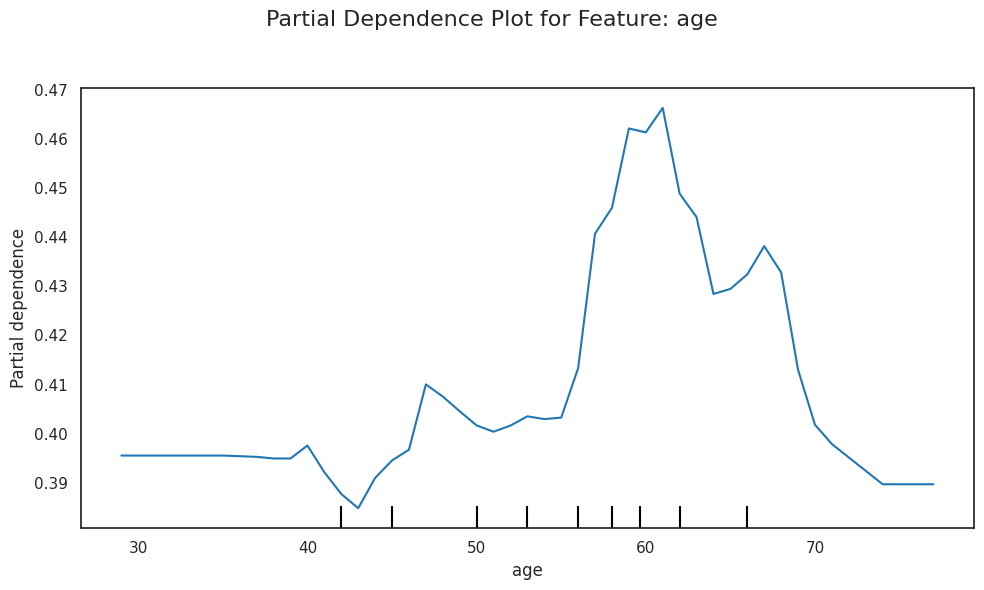

Processing Feature Index: 1, Feature Name: sex
Processing Feature Index: 2, Feature Name: cp


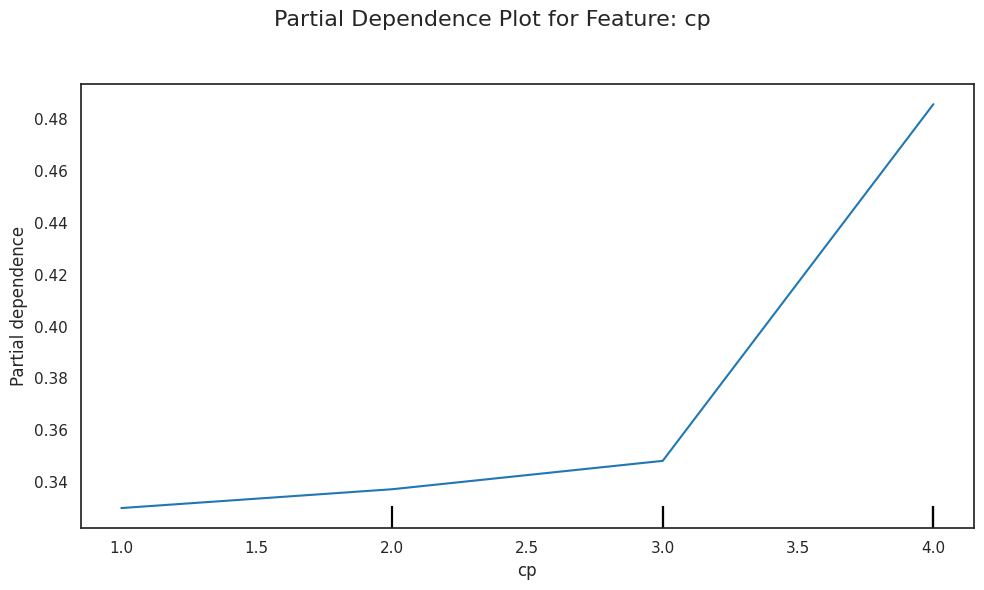

Processing Feature Index: 3, Feature Name: trestbps


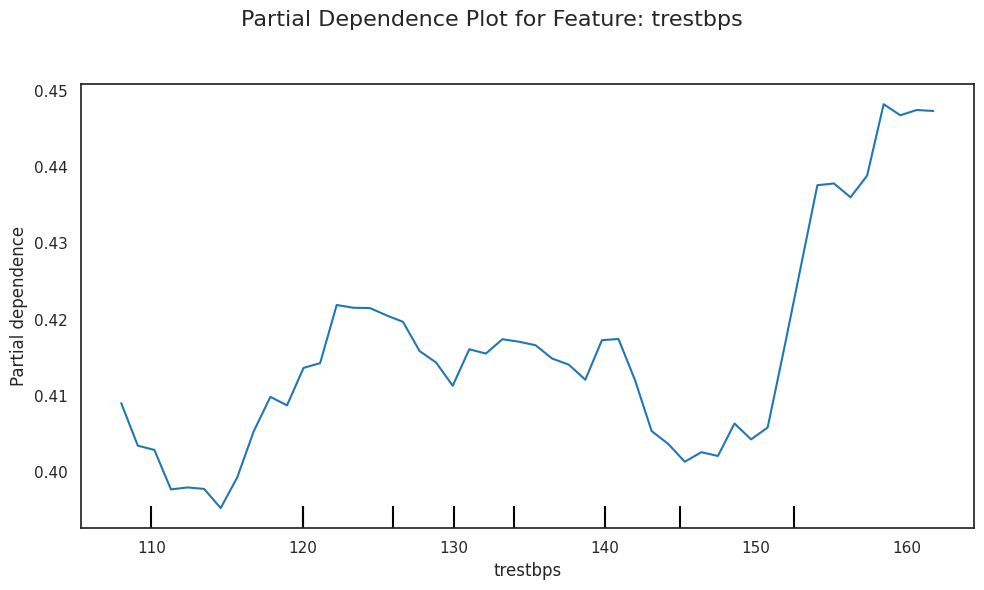

Processing Feature Index: 4, Feature Name: chol


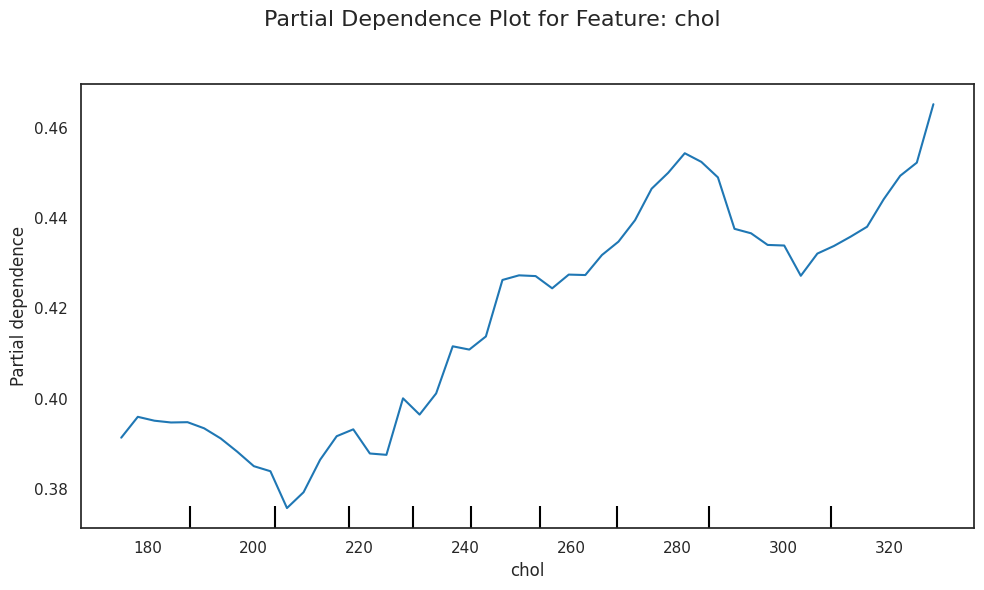

Processing Feature Index: 5, Feature Name: fbs
Processing Feature Index: 6, Feature Name: restecg


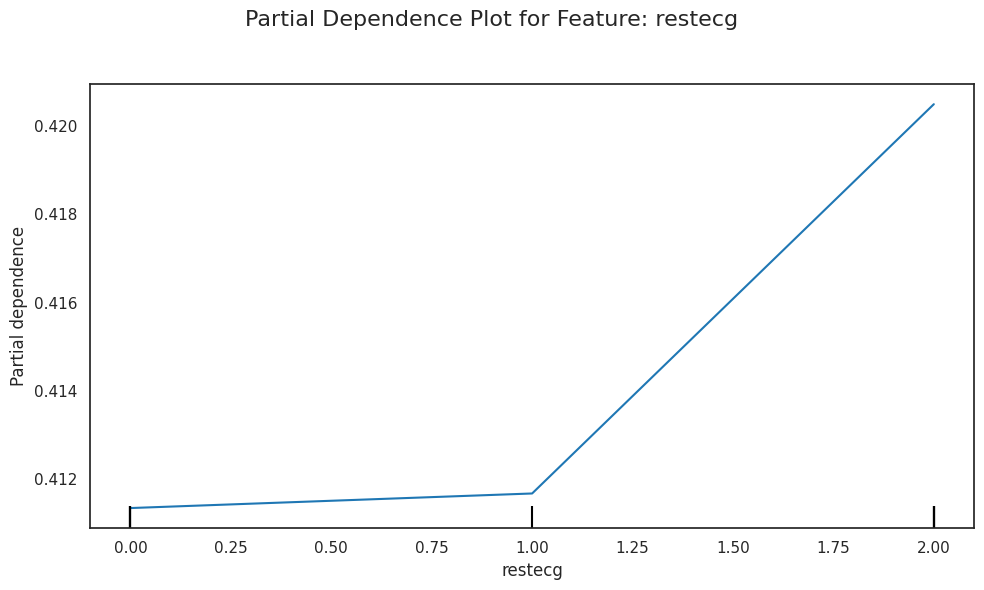

Processing Feature Index: 7, Feature Name: thalach


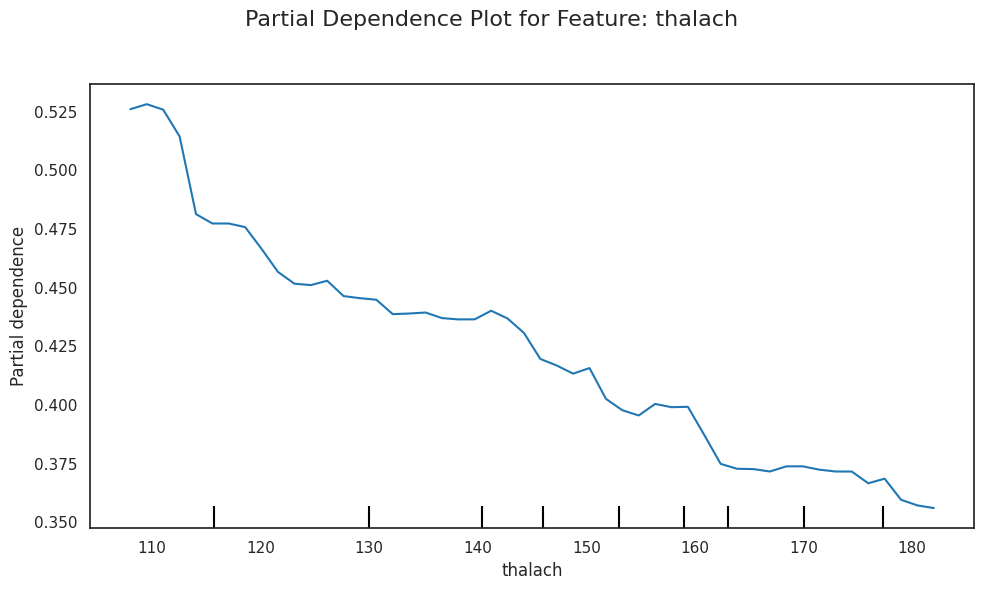

Processing Feature Index: 8, Feature Name: exang
Processing Feature Index: 9, Feature Name: oldpeak


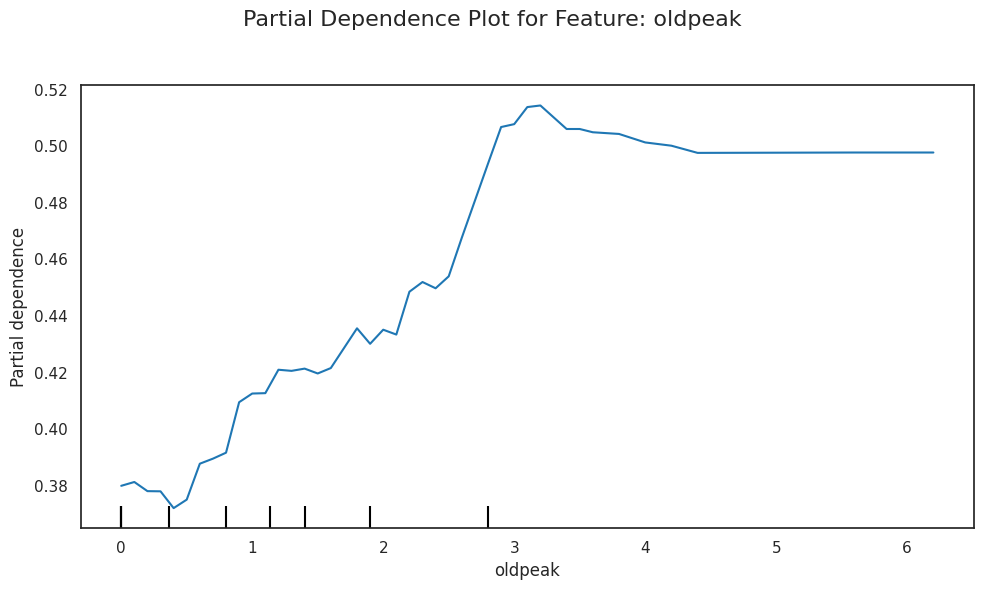

Processing Feature Index: 10, Feature Name: slope


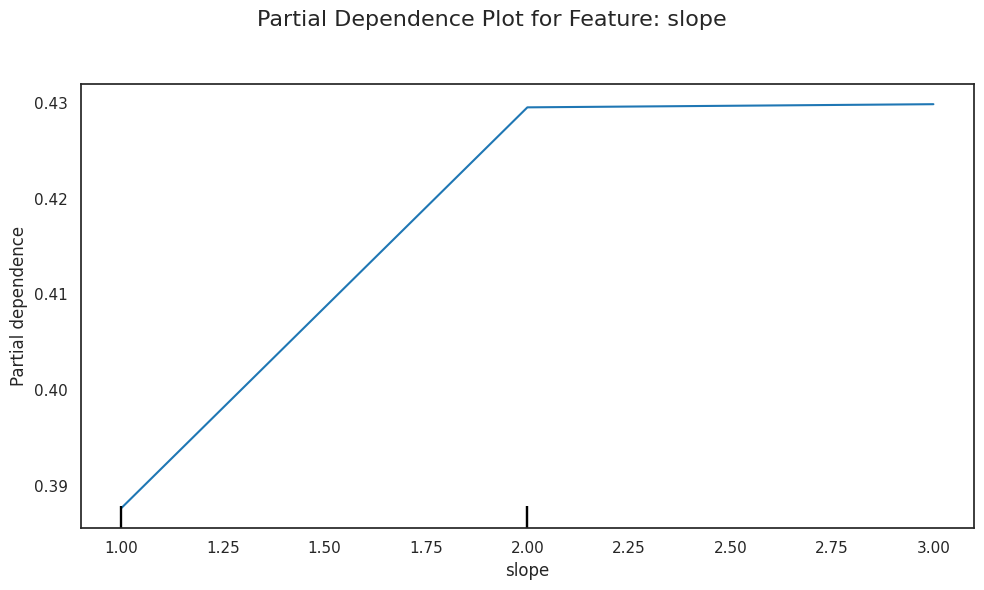

Processing Feature Index: 11, Feature Name: ca


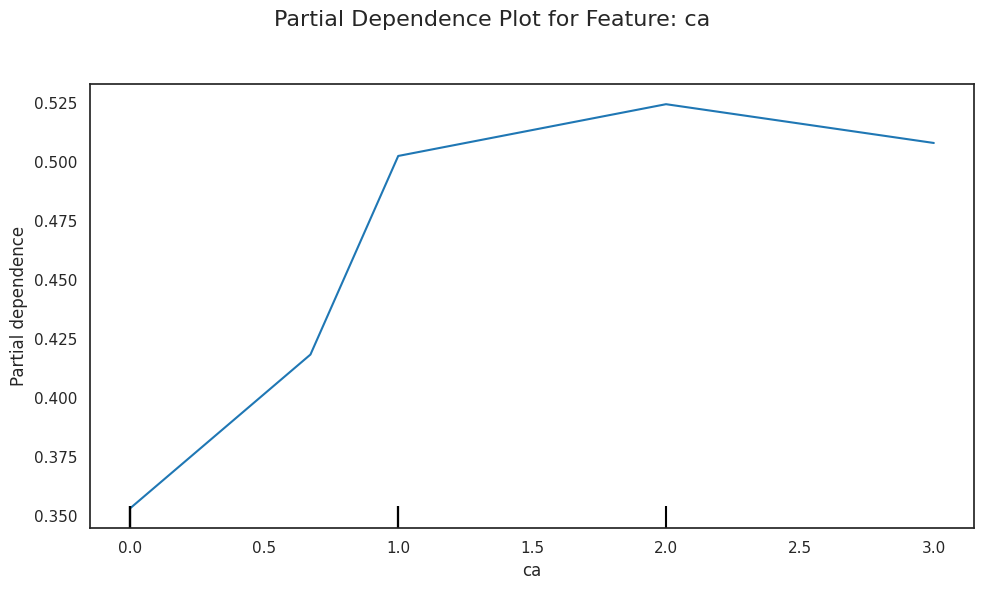

Processing Feature Index: 12, Feature Name: thal


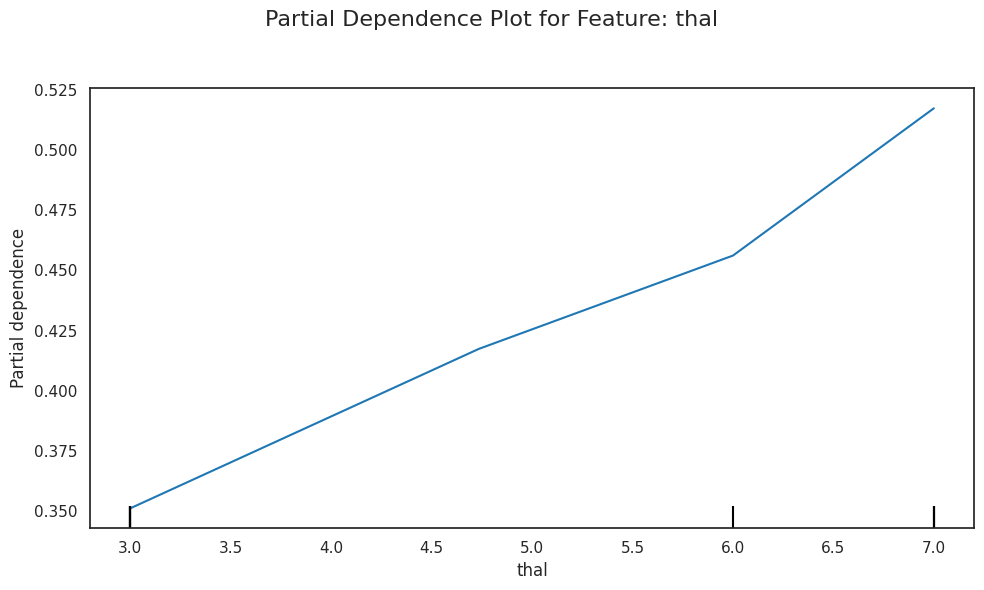

In [41]:
# Verify feature names and indices
feature_names = X.columns

for i, feature_name in enumerate(feature_names):
    print(f"Processing Feature Index: {i}, Feature Name: {feature_name}")
    
    # Plot PDP for the feature
    if not(feature_name in ['sex', 'fbs', 'exang']):
        fig, ax = plt.subplots(figsize=(10, 6))
        PartialDependenceDisplay.from_estimator(
            rf_model,
            X,
            features=[i],  # Use valid feature index
            feature_names=feature_names,
            grid_resolution=50,
            ax=ax
        )
        plt.suptitle(f"Partial Dependence Plot for Feature: {feature_name}", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

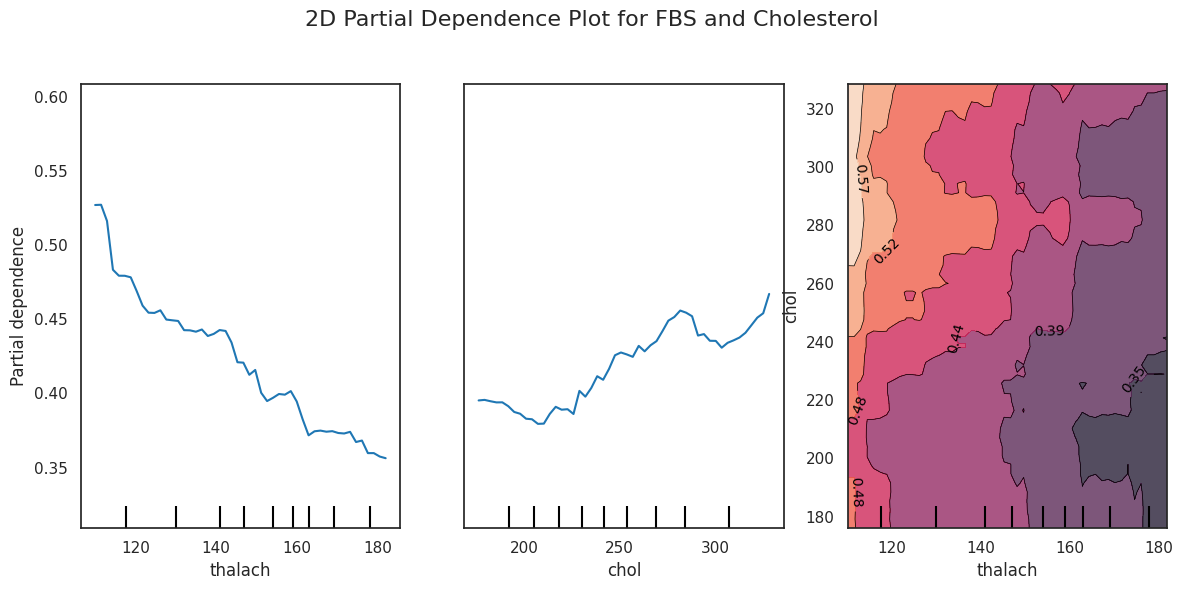

In [42]:
# Define the features for the 2D PDP
features_to_plot = ['thalach', 'chol',('thalach', 'chol')]  # Fasting blood sugar and cholesterol

# Generate the 2D PDP
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(
    rf_model,
    X_train,
    features=features_to_plot,
    grid_resolution=50,
    ax=ax,
)
plt.suptitle("2D Partial Dependence Plot for FBS and Cholesterol", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for the title
plt.show()

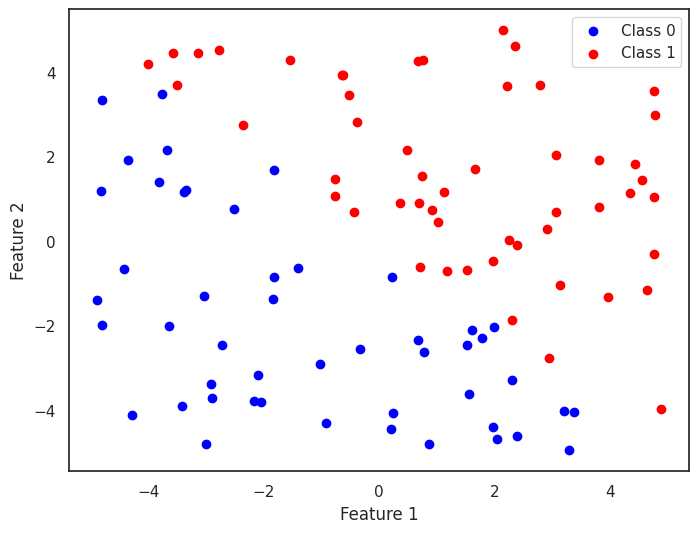

In [43]:
def create_separable_data(beta_1, beta_2, n_samples=100, random_seed=0):
    np.random.seed(random_seed)
    
    # Generate random features
    X = 10*np.random.rand(n_samples, 2)-5   # Two features ranging from 0 to 10

    # Define the linear boundary: beta_1 * x1 + beta_2 * x2 = 0
    # Points for which beta_1 * x1 + beta_2 * x2 > 0 will be in class 1, otherwise class 0
    y = (beta_1 * X[:, 0] + beta_2 * X[:, 1] > 0).astype(int)
    return X, y
X, y = create_separable_data(beta_1=1, beta_2=1, n_samples=100, random_seed=0)

# Plot the points and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [47]:
clf = LogisticRegression(random_state=0).fit(X, y)

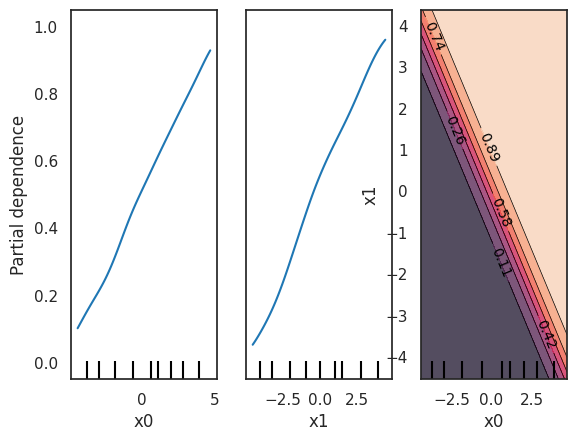

In [46]:
PartialDependenceDisplay.from_estimator(clf, X, features=[0,1,(0,1)])
plt.show()